
A retail store that has multiple outlets across the country are facing issues in managing the inventory - to match the demand with respect to supply.

Dataset Information:

The walmart.csv contains 6435 rows and 8 columns.

Store - the store number

Date - the week of sales

Weekly_Sales - sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events<br /> Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13<br /> Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13<br /> Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13<br /> Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-1

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Here,we have imported all the required python libraries that will be used in this analysis process.Now will import the data file.


In [92]:
data=pd.read_csv("Walmart.csv")
data.head(5)


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [79]:
data.tail(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


# Checking for the information about the columns

In [80]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


# lets first change the Date format into the date time ,in order to perform analysis on date too.

In [81]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')# changed the data type of date column:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [82]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,2011-06-17 00:00:00,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,2010-10-08 00:00:00,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,2011-06-17 00:00:00,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,2012-02-24 00:00:00,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,2012-10-26 00:00:00,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000
std,12.988182,NaN,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885


In [83]:
missing_value=data.isnull().sum()
missing_value_percentage=(missing_value)/data.shape[0]*100
missing_data = pd.concat([missing_value,missing_value_percentage], axis=1, keys=['Total Missing', 'Percent'])
missing_data


,Total Missing,Percent
Store,0,0.0
Date,0,0.0
Weekly_Sales,0,0.0
Holiday_Flag,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
CPI,0,0.0
Unemployment,0,0.0


Here ,we can see can that their is no null data in dataset of walmart

# Removing Outliers 

In [94]:
col=[ 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


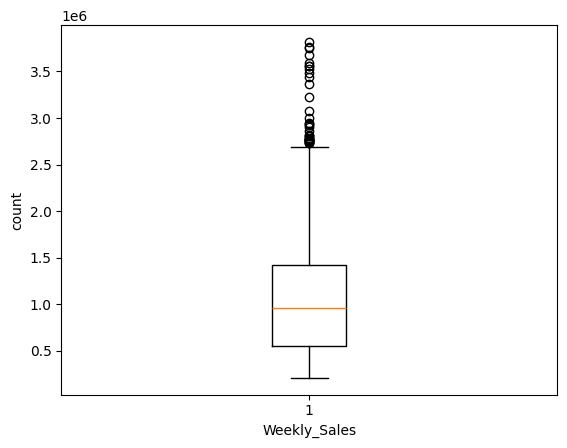

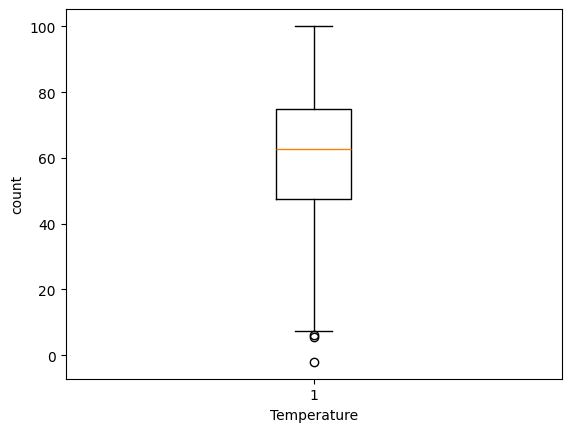

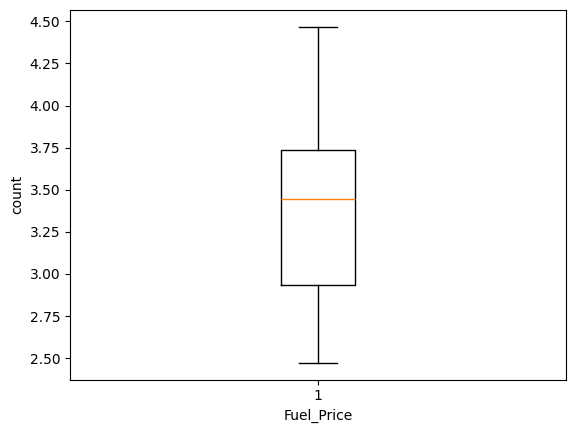

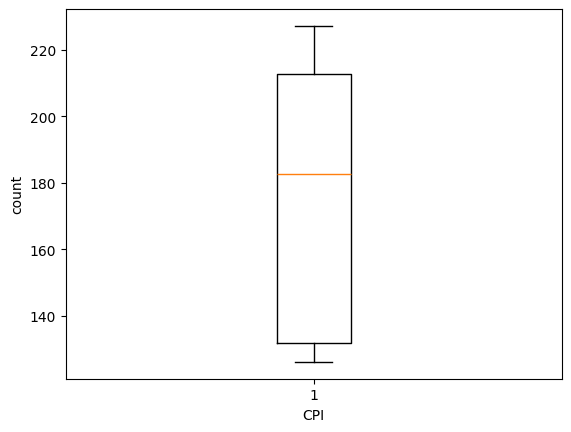

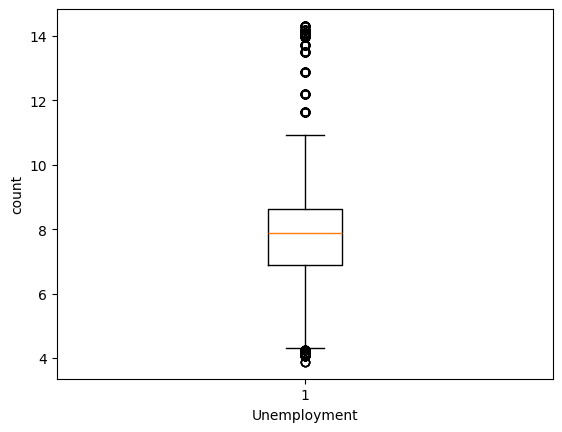

In [95]:
for   i in col:
    if (data[i].dtypes =="int") or data[i].dtypes =="float":
#  plt.figure(figsize=(3,2),dpi=200)
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()

removing outlier for the weekly_sales and unemployment 

In [96]:
Q3=data["Weekly_Sales"].quantile(0.75)
Q1=data["Weekly_Sales"].quantile(0.25)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
data=data[(data["Weekly_Sales"]>LL) & (data["Weekly_Sales"]<UL)]

Q3=data["Unemployment"].quantile(0.75)
Q1=data["Unemployment"].quantile(0.25)
IQR=Q3-Q1
UL=Q3+1.5*IQR
LL=Q1-1.5*IQR
data=data[(data["Unemployment"]>LL) & (data["Unemployment"]<UL)]



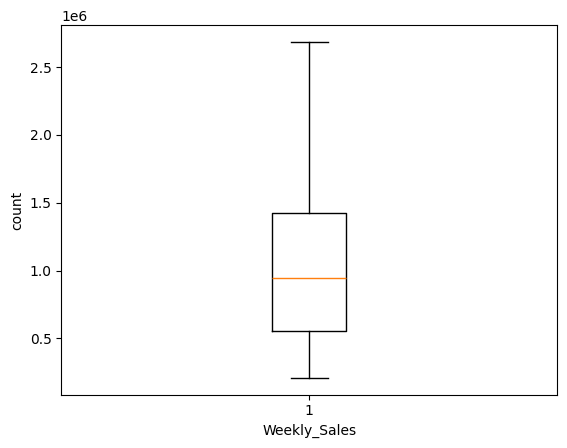

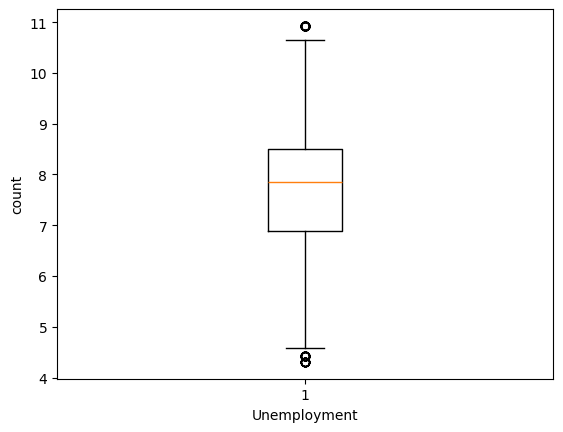

In [101]:
col1=[ 'Weekly_Sales',   'Unemployment']
for i in col1:
    if (data[i].dtypes =="int") or data[i].dtypes =="float":
        plt.boxplot(data[i])
        plt.xlabel(i)
        plt.ylabel("count")
        plt.show()
        

In [57]:
data.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5920.000000,5920,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000
mean,22.798142,2011-06-14 15:31:37.297297152,1.039202e+06,0.069088,60.404422,3.340395,175.010815,7.722377
min,1.000000,2010-02-05 00:00:00,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,2010-10-08 00:00:00,5.526404e+05,0.000000,46.965000,2.891000,132.766139,6.891000
50%,22.000000,2011-06-10 00:00:00,9.469219e+05,0.000000,62.610000,3.418500,190.006988,7.852000
75%,34.000000,2012-02-17 00:00:00,1.427444e+06,0.000000,74.722500,3.721000,213.793561,8.494000
max,45.000000,2012-10-26 00:00:00,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000
std,13.092635,NaN,5.518484e+05,0.253625,18.427013,0.458143,39.022611,1.243156


# How  the  special  Holiday price affecting the weekly sales of various stores?

In [207]:
df_holidays = data.copy()
df_holidays.head()  
df_holidays['Holiday_Flag'].max()

np.int64(1)

/var/folders/pm/_x3_30fx12v1cmg1svz1jjd40000gn/T/ipykernel_28495/3221212160.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_holidays_sales= df_holidays.groupby('Holidays_Cat')['Weekly_Sales'].mean().reset_index()


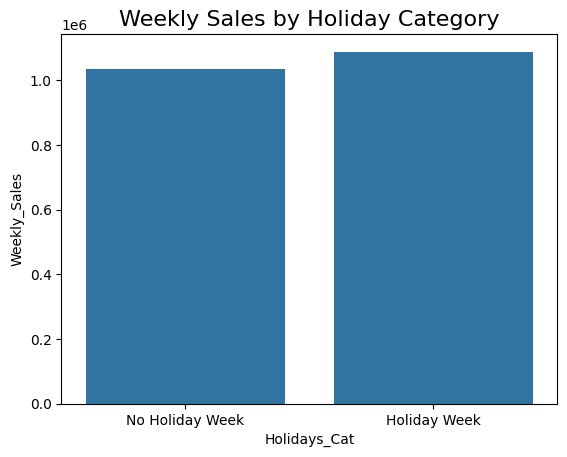

In [208]:
bins = [-0.1, 0.5, 1.1]  # Bin edges to include both 0 and 1 values
labels = ['No Holiday Week', 'Holiday Week']  # Two labels for two bins

df_holidays['Holidays_Cat'] = pd.cut(df_holidays['Holiday_Flag'], bins=bins, labels=labels)

df_holidays_count = df_holidays['Holidays_Cat'].value_counts().sort_index()
df_holidays_count
df_holidays.head()
df_holidays_sales= df_holidays.groupby('Holidays_Cat')['Weekly_Sales'].mean().reset_index()
sns.barplot(x='Holidays_Cat', y='Weekly_Sales', data=df_holidays_sales)     
plt.title('Weekly Sales by Holiday Category', fontsize=16)

corr_holidays = df_holidays[['Weekly_Sales', 'Holiday_Flag']].corr()


In [209]:
# Calculate average sales for holiday and non-holiday weeks
avg_sales_no_holiday = df_holidays_sales.loc[df_holidays_sales['Holidays_Cat'] == 'No Holiday Week', 'Weekly_Sales'].values[0]
avg_sales_holiday = df_holidays_sales.loc[df_holidays_sales['Holidays_Cat'] == 'Holiday Week', 'Weekly_Sales'].values[0]



In [210]:
# Percentage increase
percent_increase = ((avg_sales_holiday - avg_sales_no_holiday) / avg_sales_no_holiday) * 100

print(f"Average Weekly Sales (No Holiday Week): {avg_sales_no_holiday:,.2f}")
print(f"Average Weekly Sales (Holiday Week): {avg_sales_holiday:,.2f}")
print(f"Percentage Increase in Sales during Holiday Week: {percent_increase:.2f}%")

Average Weekly Sales (No Holiday Week): 1,035,527.36
Average Weekly Sales (Holiday Week): 1,088,710.29
Percentage Increase in Sales during Holiday Week: 5.14%


# here we can see there increase of sales by more than 5% consistently 

# 1. Lets Check Store Vs. Weekly sale

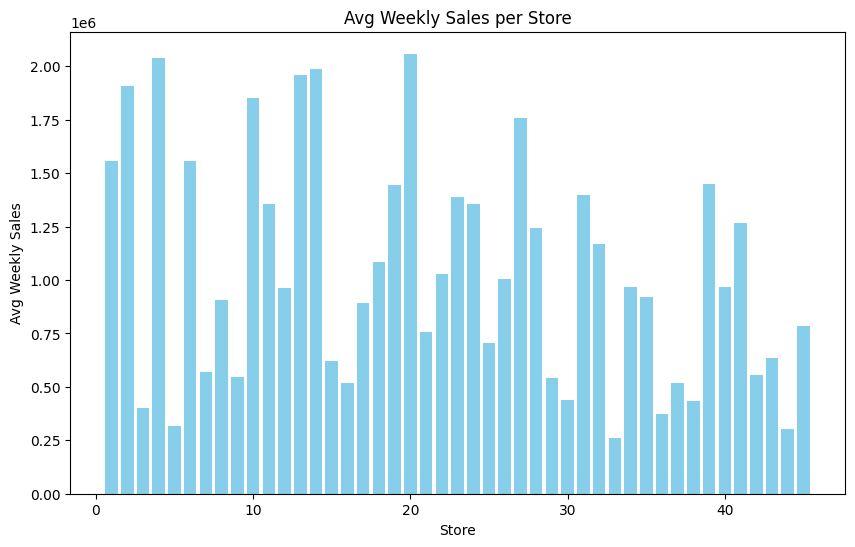

In [151]:
sale_per_store = data.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales', ascending=False)
plt.figure(figsize=(10, 6))
plt.bar(sale_per_store['Store'], sale_per_store['Weekly_Sales'], color='skyblue')
plt.xlabel('Store')
plt.ylabel('Avg Weekly Sales')
plt.title('Avg Weekly Sales per Store')
plt.xticks(rotation=0)
plt.show()

In [152]:

Most_sales=sale_per_store.head(5)
Least_sales=sale_per_store.tail(5)

([<matplotlib.axis.XTick at 0x111d94bb0>,
 [Text(20, 0, '20'),
  Text(4, 0, '4'),
  Text(14, 0, '14'),
  Text(13, 0, '13'),
  Text(2, 0, '2')])

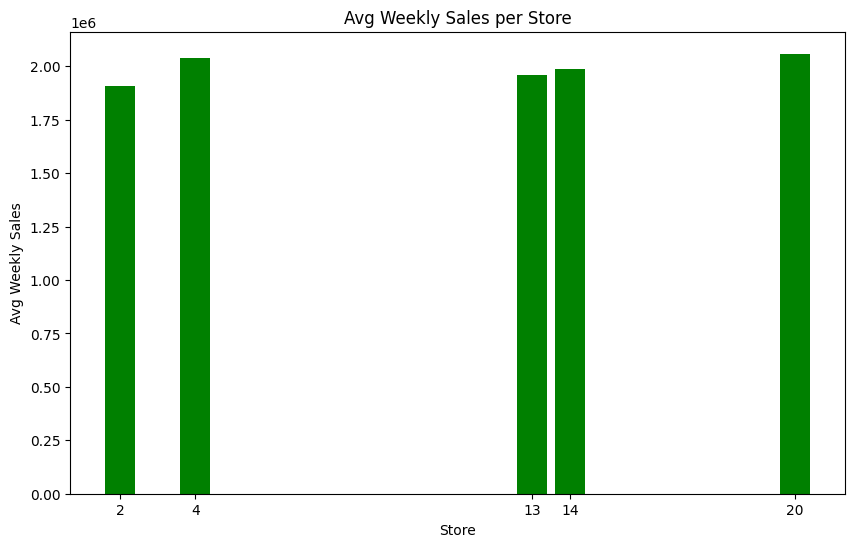

In [154]:
plt.figure(figsize=(10, 6))

plt.bar(Most_sales['Store'], Most_sales['Weekly_Sales'], color='green')
plt.xlabel('Store')
plt.ylabel('Avg Weekly Sales')
plt.title('Avg Weekly Sales per Store')
plt.xticks(Most_sales['Store'],rotation=0)


([<matplotlib.axis.YTick at 0x111e17c70>,
 [Text(0, 402704.44104895106, '402704'),
  Text(0, 373511.9927972028, '373512'),
  Text(0, 318011.8104895105, '318012'),
  Text(0, 302748.86601398606, '302749'),
  Text(0, 259861.69202797202, '259862')])

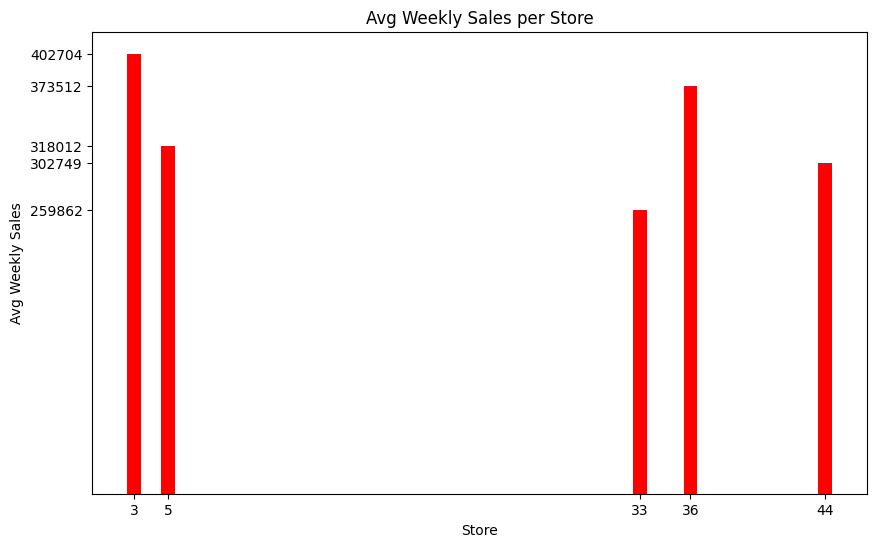

In [155]:
plt.figure(figsize=(10, 6))

plt.bar(Least_sales['Store'],Least_sales['Weekly_Sales'], color='red')
plt.xlabel('Store')
plt.ylabel('Avg Weekly Sales')
plt.title('Avg Weekly Sales per Store')
plt.xticks(Least_sales['Store'],rotation=0)
plt.yticks(Least_sales['Weekly_Sales'],rotation=0)

# 2. Effect of Unemployement on Weekly Sale

In [102]:
df=data.copy()
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5920.000000,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000
mean,22.798142,1.039202e+06,0.069088,60.404422,3.340395,175.010815,7.722377
std,13.092635,5.518484e+05,0.253625,18.427013,0.458143,39.022611,1.243156
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,5.526404e+05,0.000000,46.965000,2.891000,132.766139,6.891000
50%,22.000000,9.469219e+05,0.000000,62.610000,3.418500,190.006988,7.852000
75%,34.000000,1.427444e+06,0.000000,74.722500,3.721000,213.793561,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


In [105]:
bins1=[4,6,8,10,12] # Creating the bins and labels to store the values
labels1=['4-6','6.1-8','8.1-10','10.1-12']

df['Unemployment_Rate_Cat']= pd.cut(df['Unemployment'],bins=bins1,labels=labels1)

un_counts=df['Unemployment_Rate_Cat'].value_counts().sort_index().reset_index()

print(un_counts)
df.head()



  Unemployment_Rate_Cat  count
0                   4-6    515
1                 6.1-8   2774
2                8.1-10   2380
3               10.1-12    251


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Unemployment_Rate_Cat
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,8.1-10
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,8.1-10
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,8.1-10
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,8.1-10
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,8.1-10


In [106]:
df.isnull().sum()


Store                    0
Date                     0
Weekly_Sales             0
Holiday_Flag             0
Temperature              0
Fuel_Price               0
CPI                      0
Unemployment             0
Unemployment_Rate_Cat    0
dtype: int64

/var/folders/pm/_x3_30fx12v1cmg1svz1jjd40000gn/T/ipykernel_28495/2345946932.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Un_Employment_Sales=df.groupby("Unemployment_Rate_Cat")['Weekly_Sales'].sum().reset_index()


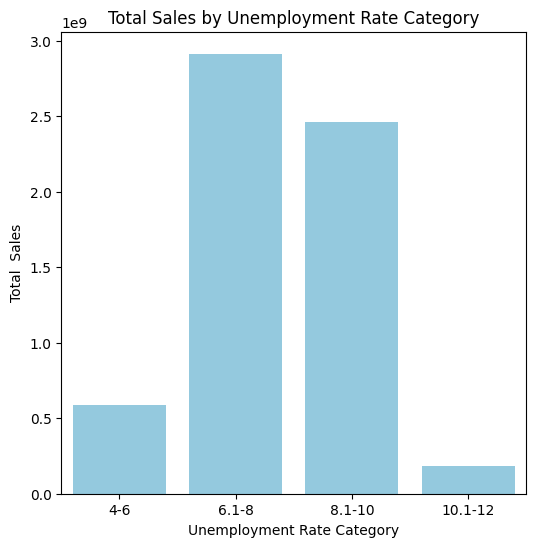

In [170]:
Un_Employment_Sales=df.groupby("Unemployment_Rate_Cat")['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(6, 6))
sns.barplot(x='Unemployment_Rate_Cat', y='Weekly_Sales', data=Un_Employment_Sales, color='skyblue')
plt.xlabel('Unemployment Rate Category')
plt.ylabel('Total  Sales')
plt.title('Total Sales by Unemployment Rate Category')
plt.xticks(rotation=0)
plt.show()




<Axes: >

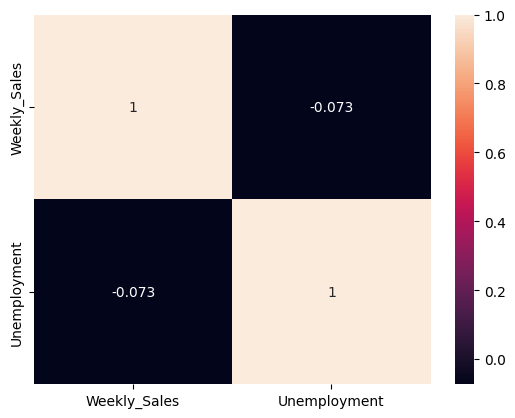

In [169]:
correlation = df[['Weekly_Sales', 'Unemployment']].corr()
sns.heatmap(correlation,annot=True)

Observation: It can be seen here for unemployment rate 6-8 the sale is maximum. Afterwards, sale is decreasing.
Hence, Sales and Unemployement are negatively correlated.

# 3. Does temperature affect the weekly sales in any manner?

In [64]:
df2=data.copy()
df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


In [65]:
df2["Temperature"].min()

np.float64(-2.06)

In [66]:
df2["Temperature"].max()

np.float64(100.14)

In [156]:



bins = [-5,0,10, 20, 30, 40, 50, 60, 70, 80, 90, 101]
temp_label = ['(-5)-0','1-10','11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-101']
df2['Temp_Cat'] = pd.cut(df2["Temperature"], bins=bins, labels=temp_label)
temp_counts = df2['Temp_Cat'].value_counts().sort_index()
print(temp_counts)


Temp_Cat
(-5)-0       1
1-10         5
11-20       78
21-30      305
31-40      556
41-50      796
51-60      960
61-70     1131
71-80     1154
81-90      807
91-101     127
Name: count, dtype: int64


In [114]:
df2.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Temp_Cat
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,41-50
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,31-40
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,31-40
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,41-50
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,41-50


In [115]:
#df1['Temp_Cat']=df1['Temp_Cat'].dropna().axis =1
df2.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Temp_Cat        0
dtype: int64

In [173]:
temp_sales = df2.groupby('Temp_Cat')['Weekly_Sales'].sum().reset_index()

temp_sales

/var/folders/pm/_x3_30fx12v1cmg1svz1jjd40000gn/T/ipykernel_28495/2066928580.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales = df2.groupby('Temp_Cat')['Weekly_Sales'].sum().reset_index()


,Temp_Cat,Weekly_Sales
0,(-5)-0,5.580278e+05
1,1-10,4.304461e+06
2,11-20,6.592093e+07
3,21-30,3.105905e+08
4,31-40,6.090936e+08
5,41-50,8.664387e+08
6,51-60,9.917823e+08
7,61-70,1.195554e+09
8,71-80,1.226182e+09
9,81-90,7.840355e+08


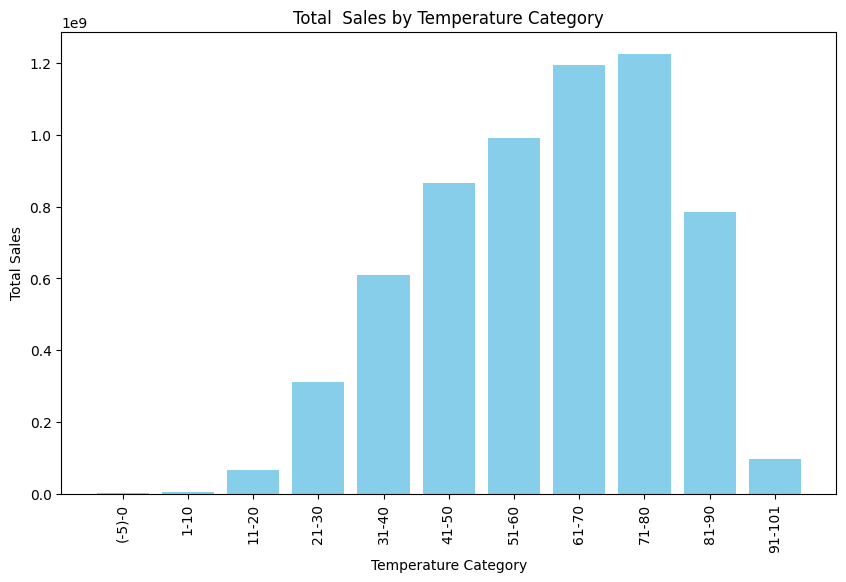

In [174]:


plt.figure(figsize=(10, 6))
plt.bar(temp_sales['Temp_Cat'], temp_sales['Weekly_Sales'], color='skyblue')
plt.xlabel('Temperature Category')
plt.ylabel('Total Sales')
plt.title('Total  Sales by Temperature Category')
plt.xticks(rotation=90)
plt.show()



<Axes: >

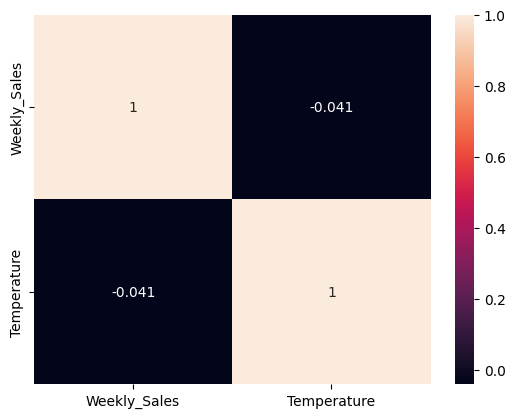

In [125]:
corr_temp = df2[['Weekly_Sales', 'Temperature']].corr()
sns.heatmap(corr_temp,annot=True)


It can be seen that sales are very low when temperature is very low or very high.

Sales is found to be  increasing when temperature is increasing

Sale is at peak when temperature lies in range (71-80)

# 4. How is the Consumer Price index affecting the weekly sales of various stores?

In [130]:
df_cpi=data.copy()
df_cpi.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [131]:
df_cpi['CPI'].max()

np.float64(227.2328068)

In [132]:
df_cpi['CPI'].min()

np.float64(126.064)

In [144]:
bins = [125,135,145,155,165,175,185,195,205,215,230] # Creating bins  and label to sort the tempeture values
temp_label = ['126-135','136-145','146-155','156-165','166-175','176-185','186-195','196-205','206-215', '216-230'] 


df_cpi['CPI_Cat'] = pd.cut(df_cpi["CPI"], bins=bins, labels=temp_label)
cpi_counts = df_cpi['CPI_Cat'].value_counts().sort_index()
print(cpi_counts)

CPI_Cat
126-135    1728
136-145     917
146-155       0
156-165       0
166-175       0
176-185     117
186-195     517
196-205     358
206-215    1125
216-230    1158
Name: count, dtype: int64


/var/folders/pm/_x3_30fx12v1cmg1svz1jjd40000gn/T/ipykernel_28495/2422264789.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cpi_Sales=df_cpi.groupby("CPI_Cat")['Weekly_Sales'].sum().reset_index()


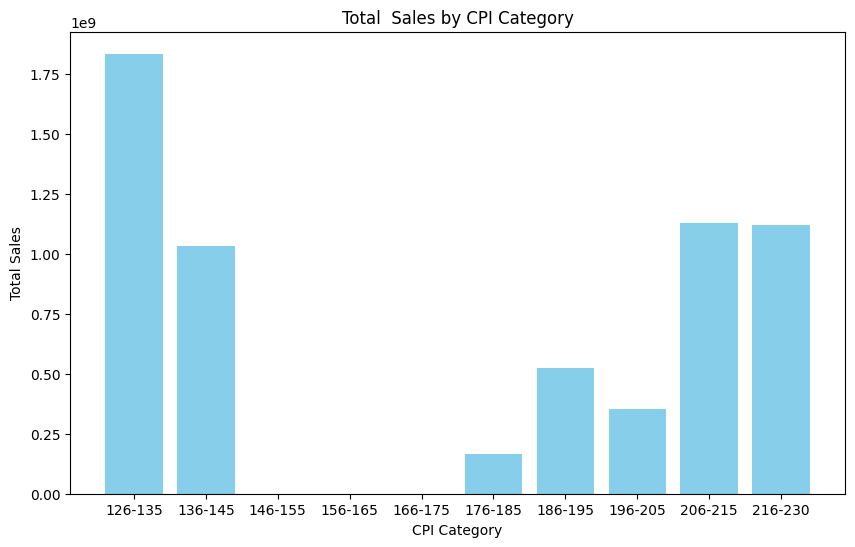

In [176]:
cpi_Sales=df_cpi.groupby("CPI_Cat")['Weekly_Sales'].sum().reset_index()
cpi_Sales

plt.figure(figsize=(10, 6))
plt.bar(cpi_Sales['CPI_Cat'],cpi_Sales['Weekly_Sales'], color='skyblue')
plt.xlabel('CPI Category')
plt.ylabel('Total Sales')
plt.title('Total  Sales by CPI Category')
plt.xticks(rotation=0)
plt.show()



<Axes: >

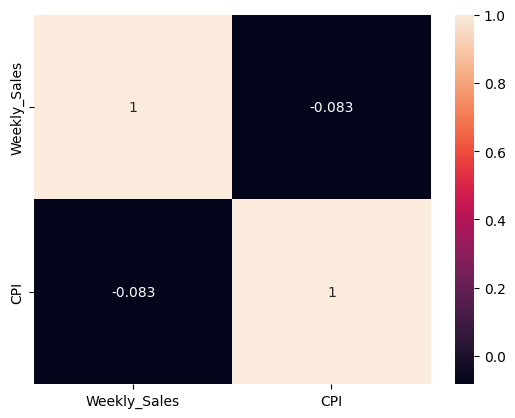

In [177]:
corr_cpi = df_cpi[['Weekly_Sales', 'CPI']].corr()
sns.heatmap(corr_cpi, annot=True)

# 5. How is the Fuel price affecting the weekly sales of various stores?

In [179]:
df_fuel=data.copy()
df_fuel.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [180]:
df_fuel.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5920.000000,5.920000e+03,5920.000000,5920.000000,5920.000000,5920.000000,5920.000000
mean,22.798142,1.039202e+06,0.069088,60.404422,3.340395,175.010815,7.722377
std,13.092635,5.518484e+05,0.253625,18.427013,0.458143,39.022611,1.243156
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,4.308000
25%,11.000000,5.526404e+05,0.000000,46.965000,2.891000,132.766139,6.891000
50%,22.000000,9.469219e+05,0.000000,62.610000,3.418500,190.006988,7.852000
75%,34.000000,1.427444e+06,0.000000,74.722500,3.721000,213.793561,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


In [182]:
bins= [2.0,2.5,3.0,3.5,4.0,4.5] # Creating bins  and label to sort the tempeture values
labels= ['2.0-2.5','2.6-3.0','3.1-3.5','3.6-4.0','4.1-4.5']

df_fuel['Fuel_Price_Cat'] = pd.cut(df_fuel['Fuel_Price'], bins=bins, labels=labels)

df_fuel_count = df_fuel['Fuel_Price_Cat'].value_counts().sort_index()
df_fuel_count

Fuel_Price_Cat
2.0-2.5       1
2.6-3.0    1834
3.1-3.5    1364
3.6-4.0    2406
4.1-4.5     315
Name: count, dtype: int64

/var/folders/pm/_x3_30fx12v1cmg1svz1jjd40000gn/T/ipykernel_28495/85547539.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_fuel_Sales= df_fuel.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()


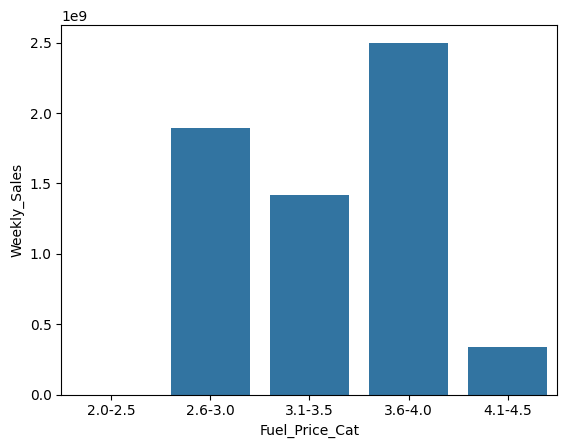

In [183]:
df_fuel_Sales= df_fuel.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()
df_fuel_Sales

sns.barplot(x='Fuel_Price_Cat', y='Weekly_Sales', data=df_fuel_Sales)

corr_fuel = df_fuel[['Weekly_Sales', 'Fuel_Price']].corr()

<Axes: >

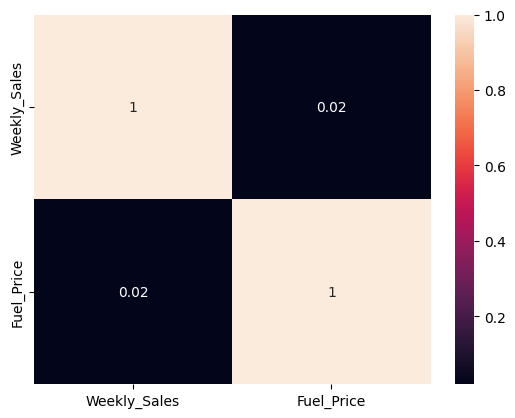

In [295]:
sns.heatmap(corr_fuel, annot=True)

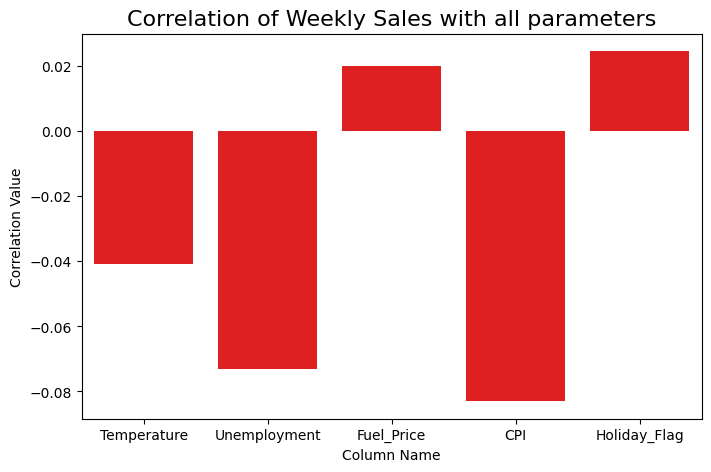

In [198]:

correlations = {}
numeric_cols = ['Temperature', 'Unemployment', 'Fuel_Price', 'CPI', 'Holiday_Flag']

for col in numeric_cols:
    corr = data[['Weekly_Sales', col]].corr().iloc[0, 1]
    correlations[col] = corr

# Prepare data for plotting
corr_df = pd.DataFrame(list(correlations.items()), columns=['Column', 'Correlation'])

# Plot bar graph of correlation values
plt.figure(figsize=(8,5))
sns.barplot(x='Column', y='Correlation', data=corr_df ,color='red')
plt.title('Correlation of Weekly Sales with all parameters', fontsize=16)
plt.ylabel('Correlation Value')
plt.xlabel('Column Name')

plt.show()

#  Top performing Months according to the historical data

In [201]:
df_sales= data.copy()
df_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [205]:
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format='%d-%m-%Y')
df_sales['Month'] = df_sales['Date'].dt.month

df_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,3
...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667,10
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667,10
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10


In [206]:
df_top_sales= df_sales.groupby('Month')['Weekly_Sales'].sum().reset_index()
df_top=df_top_sales.sort_values(by='Weekly_Sales', ascending=False).head(5)

Text(0.5, 1.0, 'Top 5 Month in Sales')

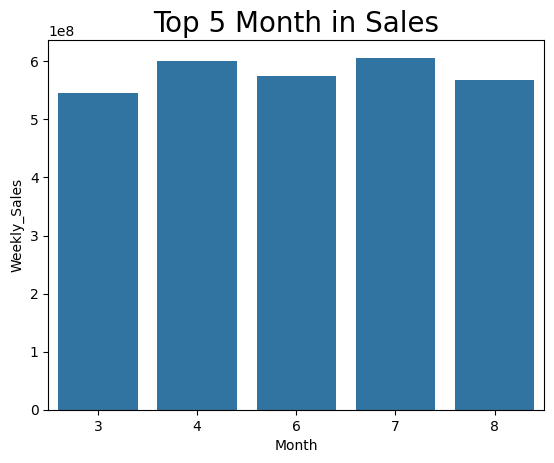

In [204]:

sns.barplot(x="Month",y="Weekly_Sales",data=df_top)
plt.title('Top 5 Month in Sales',fontsize=20) 

here we can clearly see that month 4 and 7 have top sales i.e april and june
and the march month has the least sales